In [1]:
# import işlemelri

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import findspark
findspark.init("C:\spark")

Mapreduce --> apache hadoop'un bileşenlerinden birisi. Büyük verinin etkili olmasını sağlayan paralel hesaplama mimarisidir.
apache spark --> büyük veride bellek içi hesaplama yapabilen bir araç
rdd, rdds --> apache spark'ın bellek içi veri işleme şeklidir. 

Mapreduce vs rdds --> diskten okuma ve diskten yazma maliyetlerinden dolayı mapreduce yerine rdds ile verinin bellek içi tutularak (in memory) lazy evaluation ile ortaya çıkardığı hesaplama performansı artışıdır. 

RDD- Through RDD, we can process structured as well as unstructured data. But, in RDD user need to specify the schema of ingested data, RDD cannot infer its own.

DataFrame- In data frame data is organized into named columns. Through dataframe, we can process structured and unstructured data efficiently. It also allows Spark to manage schema.

https://medium.com/analytics-vidhya/datasets-vs-dataframes-vs-rdds-d3c2dba2d0b4

In [2]:
spark = SparkSession.builder \
    .master("local") \
    .appName("pyspark_giris") \
    .getOrCreate()

sc = spark.sparkContext
sc

<SparkContext master=local appName=pyspark_giris>

In [3]:
spark.conf.set("spark.sql.repl.eagerEval.enabled", True)

In [4]:
# Temel SparkDataFrame İşlemleri
spark_df = spark.read.csv("churn.csv", header=True, inferSchema=True)
spark_df.show(5)

+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93826.63|

In [5]:
type(spark_df)

pyspark.sql.dataframe.DataFrame

In [6]:
df = sns.load_dataset("diamonds")
type(df)

pandas.core.frame.DataFrame

In [7]:
# Pandas Dataframe versus Spark Dataframe
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
spark_df.head()

Row(RowNumber=1, CustomerId=15634602, Surname='Hargrave', CreditScore=619, Geography='France', Gender='Female', Age=42, Tenure=2, Balance=0.0, NumOfProducts=1, HasCrCard=1, IsActiveMember=1, EstimatedSalary=101348.88, Exited=1)

In [9]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [10]:
spark_df.dtypes

[('RowNumber', 'int'),
 ('CustomerId', 'int'),
 ('Surname', 'string'),
 ('CreditScore', 'int'),
 ('Geography', 'string'),
 ('Gender', 'string'),
 ('Age', 'int'),
 ('Tenure', 'int'),
 ('Balance', 'double'),
 ('NumOfProducts', 'int'),
 ('HasCrCard', 'int'),
 ('IsActiveMember', 'int'),
 ('EstimatedSalary', 'double'),
 ('Exited', 'int')]

In [11]:
df.ndim

2

In [12]:
spark_df.ndim # hata verdi ndim spark dataframe'de çalışmıyor.

AttributeError: 'DataFrame' object has no attribute 'ndim'

In [13]:
# Spark'ta head yerine show kullanırız.
spark_df.show(n=5)

+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93826.63|

In [14]:
spark_df.count()

10000

In [15]:
spark_df.columns

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [16]:
spark_df.describe().show() # çıktı düzgün gelmedi.

+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|summary|         RowNumber|       CustomerId|Surname|      CreditScore|Geography|Gender|               Age|            Tenure|          Balance|     NumOfProducts|          HasCrCard|     IsActiveMember|  EstimatedSalary|             Exited|
+-------+------------------+-----------------+-------+-----------------+---------+------+------------------+------------------+-----------------+------------------+-------------------+-------------------+-----------------+-------------------+
|  count|             10000|            10000|  10000|            10000|    10000| 10000|             10000|             10000|            10000|             10000|              10000|              10000|            10000|              10000|
|   mean|            5000.5|

In [17]:
spark_df.describe().toPandas().head() # çıktı düzgün gelmezse toPandas ile alışık olduğumuz tablo çıktısını elde edebiliriz.

,summary,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,mean,5000.5,1.56909405694E7,None,650.5288,None,None,38.9218,5.0128,76485.88928799961,1.5302,0.7055,0.5151,100090.2398809998,0.2037
2,stddev,2886.8956799071675,71936.18612274907,None,96.65329873613035,None,None,10.487806451704587,2.8921743770496837,62397.40520238599,0.5816543579989917,0.45584046447513327,0.49979692845891815,57510.49281769821,0.40276858399486065
3,min,1,15565701,Abazu,350,France,Female,18,0,0.0,1,0,0,11.58,0
4,max,10000,15815690,Zuyeva,850,Spain,Male,92,10,250898.09,4,1,1,199992.48,1


In [18]:
spark_df.describe(["Age", "Exited"]).show() # describe fonksiyonu show ile kullanılabilir burada da.

+-------+------------------+-------------------+
|summary|               Age|             Exited|
+-------+------------------+-------------------+
|  count|             10000|              10000|
|   mean|           38.9218|             0.2037|
| stddev|10.487806451704587|0.40276858399486065|
|    min|                18|                  0|
|    max|                92|                  1|
+-------+------------------+-------------------+



In [19]:
spark_df.filter(spark_df.Age > 40).show(5) # bir koşula göre değişken seçme

+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        5|  15737888|Mitchell|        850|    Spain|Female| 43|     2|125510.82|            1|        1|             1|        79084.1|

In [20]:
spark_df.filter(spark_df.Age > 40).count() # bu koşulu sağlayan kaç eleman var? 

3581

In [21]:
spark_df.groupby("Exited").count().show() # spark dataframe'i groupby yönteminin uygulanması

+------+-----+
|Exited|count|
+------+-----+
|     1| 2037|
|     0| 7963|
+------+-----+



In [22]:
spark_df.groupby("Exited").agg({"Age": "mean"}).show() 

+------+-----------------+
|Exited|         avg(Age)|
+------+-----------------+
|     1| 44.8379970544919|
|     0|37.40838879819164|
+------+-----------------+



In [23]:
# SQL İşlemleri

spark_df.createOrReplaceTempView("tbl_df") # geçici tablo oluşturma. İşlemler bu geçici tablo üzerinde yapılacak. 

In [24]:
spark.sql("show databases").show() 

+---------+
|namespace|
+---------+
|  default|
+---------+



In [25]:
spark.sql("show tables").show() # tbl_df geçici tablosunı bu işlemle görebiliyoruz.

+--------+---------+-----------+
|database|tableName|isTemporary|
+--------+---------+-----------+
|        |   tbl_df|       true|
+--------+---------+-----------+



In [26]:
spark.sql("select Age from tbl_df limit 5").show() # oluşturulan geçici tablodaki yaş değişkenine ait ilk 5 değeri görme

+---+
|Age|
+---+
| 42|
| 41|
| 42|
| 39|
| 43|
+---+



In [27]:
spark.sql("select Exited, avg(Age) from tbl_df group by Exited").show() # payspark kullanarak sql ile group by işlemi yapma

+------+-----------------+
|Exited|         avg(Age)|
+------+-----------------+
|     1| 44.8379970544919|
|     0|37.40838879819164|
+------+-----------------+



In [28]:
# Büyük Veride Görselleştirme

sns.barplot(x="Exited", y=spark_df.Exited.index, data=spark_df) # sns.barplot çalışmıyor spark dataframe'inde

AttributeError: 'DataFrame' object has no attribute 'get'

In [29]:
spark_df.groupby("Exited").agg({"Age": "mean"}).show()

+------+-----------------+
|Exited|         avg(Age)|
+------+-----------------+
|     1| 44.8379970544919|
|     0|37.40838879819164|
+------+-----------------+



In [30]:
spark_df.groupby("Exited").agg({"Age": "mean"}).toPandas()

,Exited,avg(Age)
0,1,44.837997
1,0,37.408389


In [31]:
sdf = spark_df.groupby("Exited").agg({"Age": "mean"}).toPandas() # sdf spark dataframe'den pandas dataframe'e çevrildi.
type(sdf)

pandas.core.frame.DataFrame

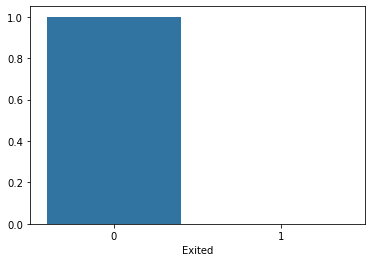

In [32]:
sns.barplot(x="Exited", y=sdf.Exited.index, data=sdf)
plt.show()

In [33]:
# GBM ile Müşteri Terk Modellemesi

spark_df = spark.read.csv("churn.csv", header=True, inferSchema=True)
spark_df = spark_df.toDF(*[c.lower() for c in spark_df.columns]) # değişken isimleri küçük harf olacak şekilde standartlaştırıldı.
spark_df.show(5)

+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|rownumber|customerid| surname|creditscore|geography|gender|age|tenure|  balance|numofproducts|hascrcard|isactivemember|estimatedsalary|exited|
+---------+----------+--------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        2|  15647311|    Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        3|  15619304|    Onio|        502|   France|Female| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        4|  15701354|    Boni|        699|   France|Female| 39|     1|      0.0|            2|        0|             0|       93826.63|

In [34]:
# spark_df = spark_df.withColumnRenamed("_c0", "index") --> değişen adlarını değiştirme
# spark_df.show(5)

In [34]:
len(spark_df.columns)

14

In [35]:
spark_df.select("age", "creditscore", "tenure", "balance", "estimatedsalary"
                , "exited").describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,10000,38.9218,10.487806451704587,18,92
creditscore,10000,650.5288,96.65329873613035,350,850
tenure,10000,5.0128,2.8921743770496837,0,10
balance,10000,76485.88928799961,62397.40520238599,0.0,250898.09
estimatedsalary,10000,100090.2398809998,57510.49281769821,11.58,199992.48
exited,10000,0.2037,0.40276858399486065,0,1


In [36]:
# Pyspark ile eksik verilerin olup olmadığının gözlemlenmesi
from pyspark.sql.functions import isnan, when, count, col
spark_df.select([count(when(isnan(c), c)).alias(c) for c in spark_df.columns])
# spark_df = spark_df.dropna() # eksik veri varsa aynı pandastaki gibi böyle drop edilebilir.

rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
"""spark_df = spark_df.withColumn("age_kare", spark_df.age ** 2) # değişken üretme
spark_df.toPandas().head() # çıktı kötü geliyordu çok fazla feature olduğu için"""

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,age_kare
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1764.0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1681.0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1764.0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1521.0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1849.0


# BAĞIMLI DEĞİŞKENİN SEÇİLMESİ

In [40]:
from pyspark.ml.feature import StringIndexer

# spark için bağımlı değişkenin tanımı label'dır. 
# Bağımsız değişkenler (feature'lar) de spark'a vektör olarak verilmelidir. 

stringIndexer = StringIndexer(inputCol ="exited", outputCol = "label")
mod = stringIndexer.fit(spark_df) # exited adlı bağımlı değişken aşağıdaki label olarak fit stringIndexer ile fit edilir.
indexed = mod.transform(spark_df) # transform ile exited'ın label olarak dönüştürülmesi işlemi gerçekleştirilmiş olur.
spark_df = indexed.withColumn("label", indexed["label"].cast("integer")) # label integer olarak dönüştürülür.
spark_df.toPandas().head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,label
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0


In [41]:
# Model için gereksiz değişkenleri düşür
spark_df = spark_df.drop("CustomerId", "Surname", "RowNumber", "exited")
spark_df.toPandas().head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,label
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# BAĞIMSIZ DEĞİŞKENLERİ SEÇİLMESİ

In [42]:
spark_df.columns

['creditscore',
 'geography',
 'gender',
 'age',
 'tenure',
 'balance',
 'numofproducts',
 'hascrcard',
 'isactivemember',
 'estimatedsalary',
 'label']

In [43]:
col_type = spark_df.dtypes # spark dataframe'in değişken adı ve veri tiplerini bir liste olarak al
col_type

[('creditscore', 'int'),
 ('geography', 'string'),
 ('gender', 'string'),
 ('age', 'int'),
 ('tenure', 'int'),
 ('balance', 'double'),
 ('numofproducts', 'int'),
 ('hascrcard', 'int'),
 ('isactivemember', 'int'),
 ('estimatedsalary', 'double'),
 ('label', 'int')]

In [44]:
# kategorik değişkenleri seçme
cat_cols = [col[0] for col in col_type if col[1] == "string"]
cat_cols

['geography', 'gender']

In [45]:
# Kategorik değişkenler StringIndexer kullanılarak modele sokulmadan önce değiştirilir.

def indexer_for_catcols(categorical_cols, spark_df):
    from pyspark.ml.feature import StringIndexer
    """This function takes categorical column names in list and spark dataframe as arguments.
    It returns a list of labeled categorical names and new spark dataframe"""
    cat_col_num_name = []
    for i in categorical_cols:
        cat_col_num_name.append(i + "_num")
        indexer = StringIndexer(inputCol = i, outputCol = i + "_num") 
        indexer_model = indexer.fit(spark_df)
        indexer_df = indexer_model.transform(spark_df)
        spark_df = indexer_df
    return cat_col_num_name, spark_df

cat_col_num_name, spark_df = indexer_for_catcols(cat_cols, spark_df)
spark_df.toPandas().head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,label,geography_num,gender_num
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.0,1.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2.0,1.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0.0,1.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.0,1.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2.0,1.0


# One Hot Encoder

In [46]:
def one_hot_encoder(cat_col_num_name, spark_df):
    """This function takes categorical column names that were found with indexer_for_catcols function in list and spark dataframe as 
    arguments. It returns encoded spark dataframe"""
    from pyspark.ml.feature import OneHotEncoder 
    for i in cat_col_num_name:
        encoder = OneHotEncoder(inputCol = i, outputCol = i + "_ohe")
        model = encoder.fit(spark_df)
        encoded = model.transform(spark_df)
        encoded = encoded.drop(i)
        spark_df = encoded
    return spark_df

spark_df = one_hot_encoder(cat_col_num_name, spark_df)
spark_df.toPandas().head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,label,geography_num_ohe,gender_num_ohe
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(1.0, 0.0)",(0.0)
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(0.0, 0.0)",(0.0)
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(1.0, 0.0)",(0.0)
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(1.0, 0.0)",(0.0)
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(0.0, 0.0)",(0.0)


In [47]:
col_type = spark_df.dtypes # spark dataframe'in değişken adı ve veri tiplerini bir liste olarak al
num_cols = [col[0] for col in col_type if col[1] != "string" and col[0] != "label" and col[0] != "exited"]
num_cols # modele sokulacak bağımsız değişkenler

['creditscore',
 'age',
 'tenure',
 'balance',
 'numofproducts',
 'hascrcard',
 'isactivemember',
 'estimatedsalary',
 'geography_num_ohe',
 'gender_num_ohe']

In [50]:
# Bağımsız değişkenler vektöre döndürülerek spark'a gönderilir.
from pyspark.ml.feature import VectorAssembler
va = VectorAssembler(inputCols=num_cols, outputCol="features")
va_df = va.transform(spark_df)
va_df.toPandas().head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,label,geography_num_ohe,gender_num_ohe,features
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"(1.0, 0.0)",(0.0),"[619.0, 42.0, 2.0, 0.0, 1.0, 1.0, 1.0, 101348...."
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"(0.0, 0.0)",(0.0),"[608.0, 41.0, 1.0, 83807.86, 1.0, 0.0, 1.0, 11..."
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"(1.0, 0.0)",(0.0),"[502.0, 42.0, 8.0, 159660.8, 3.0, 1.0, 0.0, 11..."
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,"(1.0, 0.0)",(0.0),"(699.0, 39.0, 1.0, 0.0, 2.0, 0.0, 0.0, 93826.6..."
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,"(0.0, 0.0)",(0.0),"[850.0, 43.0, 2.0, 125510.82, 1.0, 1.0, 1.0, 7..."


In [52]:
final_df = va_df.select(["features", "label"])
final_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[619.0,42.0,2.0,0...|    1|
|[608.0,41.0,1.0,8...|    0|
|[502.0,42.0,8.0,1...|    1|
|(11,[0,1,2,4,7,8]...|    0|
|[850.0,43.0,2.0,1...|    0|
+--------------------+-----+
only showing top 5 rows



# MODELLEME

In [53]:
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

splits = final_df.randomSplit([0.70, 0.30])
train_df = splits[0]
test_df = splits[1]

In [54]:
test_df.show(5)


+--------------------+-----+
|            features|label|
+--------------------+-----+
|(11,[0,1,2,3,4,7]...|    1|
|(11,[0,1,2,3,4,7]...|    0|
|(11,[0,1,2,3,4,7]...|    1|
|(11,[0,1,2,3,4,7]...|    0|
|(11,[0,1,2,3,4,7]...|    0|
+--------------------+-----+
only showing top 5 rows



In [56]:
train_df.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(11,[0,1,2,3,4,7]...|    0|
|(11,[0,1,2,3,4,7]...|    1|
|(11,[0,1,2,3,4,7]...|    0|
|(11,[0,1,2,3,4,7]...|    1|
|(11,[0,1,2,3,4,7]...|    0|
+--------------------+-----+
only showing top 5 rows



In [57]:
gbm = GBTClassifier(maxIter=100, featuresCol="features", labelCol="label")
gbm_model = gbm.fit(train_df)
y_pred = gbm_model.transform(test_df)
y_pred.show(20)

+--------------------+-----+--------------------+--------------------+----------+
|            features|label|       rawPrediction|         probability|prediction|
+--------------------+-----+--------------------+--------------------+----------+
|(11,[0,1,2,3,4,7]...|    1|[-0.3144618117498...|[0.34775464295361...|       1.0|
|(11,[0,1,2,3,4,7]...|    0|[0.94185991057986...|[0.86803780882027...|       0.0|
|(11,[0,1,2,3,4,7]...|    1|[0.35817264334942...|[0.67180171717196...|       0.0|
|(11,[0,1,2,3,4,7]...|    0|[0.91732827780750...|[0.86231552119173...|       0.0|
|(11,[0,1,2,3,4,7]...|    0|[0.93034847896697...|[0.86537816348777...|       0.0|
|(11,[0,1,2,3,4,7]...|    0|[0.91191208686967...|[0.86102436514576...|       0.0|
|(11,[0,1,2,3,4,7]...|    0|[0.03446430833511...|[0.51722533468911...|       0.0|
|(11,[0,1,2,3,4,7]...|    0|[0.60991206604632...|[0.77203259846098...|       0.0|
|(11,[0,1,2,3,4,7]...|    1|[-0.7270406971321...|[0.18937423006778...|       1.0|
|(11,[0,1,2,3,4,

In [59]:
accuracy = y_pred.select("label", "prediction")
accuracy.show(3)

+-----+----------+
|label|prediction|
+-----+----------+
|    1|       1.0|
|    0|       0.0|
|    1|       0.0|
+-----+----------+
only showing top 3 rows



In [61]:
accuracy.filter(accuracy.label == accuracy.prediction).count() / accuracy.count()

0.8630456514495168

# Model Tuning

In [ ]:
evaluator = BinaryClassificationEvaluator()

paramGrid = (ParamGridBuilder()
             .addGrid(gbm.maxDepth, [2, 4, 6])
             .addGrid(gbm.maxBins, [20, 30])
             .addGrid(gbm.maxIter, [10, 20])
             .build())


cv = CrossValidator(estimator=gbm,
                    estimatorParamMaps=paramGrid,
                    evaluator=evaluator,
                    numFolds=5)

cv_model = cv.fit(train_df)
y_pred = cv_model.transform(test_df)
accuracy = y_pred.select("label", "prediction")
accuracy.filter(accuracy.label == accuracy.prediction).count() / accuracy.count()

In [63]:
sc.stop()